<a href="https://colab.research.google.com/github/NandakrishnanR/Kaggle_projects/blob/master/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jsphyg/weather-dataset-rattle-package")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'weather-dataset-rattle-package' dataset.
Path to dataset files: /kaggle/input/weather-dataset-rattle-package


In [5]:
import pandas as pd
import numpy as np
from pandas import DataFrame
csv=pd.read_csv("/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv")
print(csv)

              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ... 

In [6]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
#here as we have some missing values in target as well as very likely corelated feature,remove null values
csv.dropna(subset=["RainToday","RainTomorrow"],inplace=True)
csv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
px.histogram(csv,x="RainTomorrow")

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
csv.corr(numeric_only=True)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736015,0.104255,0.467147,0.073078,0.177927,0.175775,0.175835,-0.234441,0.005686,-0.451414,-0.462099,0.077367,0.020268,0.901828,0.708716
MaxTemp,0.736015,1.000000,-0.074839,0.588934,0.470221,0.068510,0.014468,0.051178,-0.506109,-0.509916,-0.331831,-0.427069,-0.290217,-0.279261,0.887038,0.984565
Rainfall,0.104255,-0.074839,1.000000,-0.064549,-0.227525,0.133497,0.086816,0.057759,0.223725,0.255312,-0.168085,-0.126728,0.198195,0.171993,0.011477,-0.079178
Evaporation,0.467147,0.588934,-0.064549,1.000000,0.366659,0.203396,0.194398,0.129166,-0.506055,-0.393149,-0.269850,-0.293098,-0.185211,-0.184395,0.545382,0.574311
Sunshine,0.073078,0.470221,-0.227525,0.366659,1.000000,-0.032196,0.009188,0.056480,-0.492784,-0.629638,0.041071,-0.020276,-0.675846,-0.704621,0.291364,0.490386
WindGustSpeed,0.177927,0.068510,0.133497,0.203396,-0.032196,1.000000,0.604513,0.686881,-0.215117,-0.026631,-0.457710,-0.412879,0.071186,0.109340,0.150574,0.033511
WindSpeed9am,0.175775,0.014468,0.086816,0.194398,0.009188,0.604513,1.000000,0.519980,-0.270564,-0.031638,-0.227540,-0.174497,0.024111,0.053369,0.129108,0.004878
WindSpeed3pm,0.175835,0.051178,0.057759,0.129166,0.056480,0.686881,0.519980,1.000000,-0.145967,0.016011,-0.295207,-0.254951,0.052370,0.024769,0.163972,0.028845
Humidity9am,-0.234441,-0.506109,0.223725,-0.506055,-0.492784,-0.215117,-0.270564,-0.145967,1.000000,0.668002,0.138916,0.186515,0.452298,0.358273,-0.473305,-0.500528
Humidity3pm,0.005686,-0.509916,0.255312,-0.393149,-0.629638,-0.026631,-0.031638,0.016011,0.668002,1.000000,-0.028127,0.051244,0.517394,0.523186,-0.222227,-0.558562


In [10]:
#convert date into year format and split train test validation split according to time seriees data
year=pd.to_datetime(csv["Date"]).dt.year
train_df=csv[year < 2015]
val_df=csv[year == 2015]
test_df=csv[year > 2015]
train_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [11]:
#train test split
from numpy.random import RandomState
from sklearn.model_selection import train_test_split
train_val_df,test_df=train_test_split(csv,test_size=0.2,random_state=42)
train_df,val_df=train_test_split(train_val_df,test_size=0.25,random_state=42)

#split feature columns and target columns

input_cols=train_df.columns[:-1]
target_cols=train_df.columns[-1]
train_input=train_df[input_cols].copy()
train_target=train_df[target_cols].copy()
val_input=val_df[input_cols].copy()
val_target=val_df[target_cols].copy()
test_input=test_df[input_cols].copy()
test_target=test_df[target_cols].copy()

In [12]:
numerical_cols=train_input.select_dtypes(include=np.number).columns.tolist()
print(numerical_cols)
categorical_cols=train_input.select_dtypes(exclude=np.number).columns.tolist()
#we also need no date column for training
categorical_cols.remove("Date")
print(f"\n{categorical_cols}")

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [13]:
train_input[numerical_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,84192.000000,84278.000000,84471.000000,48625.000000,44390.000000,79050.000000,83816.000000,82908.000000,83563.000000,82343.000000,76167.000000,76140.000000,52838.000000,50816.000000,84075.000000,82867.000000
mean,12.166808,23.222435,2.346884,5.468004,7.633936,39.975142,13.991947,18.648430,68.825030,51.440098,1017.658514,1015.265201,4.432246,4.494411,16.969566,21.680557
std,6.411351,7.124983,8.505389,4.172450,3.781045,13.540478,8.855024,8.762697,19.059801,20.828580,7.110012,7.043561,2.886058,2.718447,6.506199,6.948260
min,-8.500000,-3.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,982.000000,977.100000,0.000000,0.000000,-7.000000,-5.100000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.400000,1.000000,2.000000,12.200000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.700000,48.000000,19.000000,24.000000,83.000000,65.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.300000,135.000000,87.000000,83.000000,100.000000,100.000000,1041.000000,1038.400000,9.000000,9.000000,39.400000,46.700000


In [14]:
#TO KNOW IF THE CATEGORICAL COLUMN IS CATEGORY ITSELF OR STRING VALUES
train_input[categorical_cols].nunique()

,0
Location,49
WindGustDir,16
WindDir9am,16
WindDir3pm,16
RainToday,2


In [15]:
print("Missing values in train_input:")
print(train_input.isnull().sum())
print("\nMissing values in val_input:")
print(val_input.isnull().sum())
print("\nMissing values in test_input:")
print(test_input.isnull().sum())

Missing values in train_input:
Date                 0
Location             0
MinTemp            279
MaxTemp            193
Rainfall             0
Evaporation      35846
Sunshine         40081
WindGustDir       5461
WindGustSpeed     5421
WindDir9am        5765
WindDir3pm        2223
WindSpeed9am       655
WindSpeed3pm      1563
Humidity9am        908
Humidity3pm       2128
Pressure9am       8304
Pressure3pm       8331
Cloud9am         31633
Cloud3pm         33655
Temp9am            396
Temp3pm           1604
RainToday            0
dtype: int64

Missing values in val_input:
Date                 0
Location             0
MinTemp             96
MaxTemp             52
Rainfall             0
Evaporation      11983
Sunshine         13428
WindGustDir       1866
WindGustSpeed     1853
WindDir9am        1935
WindDir3pm         733
WindSpeed9am       189
WindSpeed3pm       489
Humidity9am        278
Humidity3pm        679
Pressure9am       2690
Pressure3pm       2695
Cloud9am         10478
Cloud3

In [16]:
train_input[numerical_cols]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
12319,4.1,21.7,0.0,4.6,11.3,31.0,13.0,20.0,53.0,20.0,1019.3,1016.9,0.0,1.0,14.1,20.9
88560,18.9,30.0,0.0,8.0,11.1,30.0,15.0,20.0,54.0,38.0,1018.5,1013.7,1.0,1.0,25.7,29.2
42526,7.3,18.5,0.2,NaN,NaN,26.0,19.0,6.0,94.0,60.0,1024.9,1021.6,6.0,NaN,10.6,18.0
139212,24.8,35.5,0.0,5.0,10.4,46.0,17.0,30.0,80.0,52.0,1014.1,1010.4,3.0,2.0,28.5,32.9
25223,13.2,32.3,0.0,NaN,NaN,22.0,4.0,7.0,72.0,34.0,NaN,NaN,NaN,NaN,20.7,30.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141207,16.0,29.9,0.0,5.0,11.0,48.0,20.0,30.0,38.0,17.0,1018.1,1013.3,0.0,0.0,20.1,29.4
95983,16.8,27.8,0.0,4.4,NaN,24.0,0.0,13.0,91.0,58.0,1016.6,1013.5,NaN,NaN,22.4,26.8
39457,8.5,24.8,0.0,4.8,NaN,28.0,19.0,13.0,56.0,24.0,1025.5,1021.9,NaN,NaN,16.9,24.7
92898,12.7,26.9,0.0,NaN,NaN,31.0,15.0,26.0,51.0,58.0,1014.3,1011.8,NaN,NaN,20.2,23.5


In [17]:
# Impute missing values in numerical columns
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
imputer.fit(train_input[numerical_cols])
train_input[numerical_cols] = imputer.transform(train_input[numerical_cols])
val_input[numerical_cols] = imputer.transform(val_input[numerical_cols])
test_input[numerical_cols] = imputer.transform(test_input[numerical_cols])


In [18]:
#scale numerical column features to same range of values
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train_input[numerical_cols])

# Assign scaled values back to the numerical columns within the DataFrames
train_input[numerical_cols] = scaler.transform(train_input[numerical_cols])
val_input[numerical_cols] = scaler.transform(val_input[numerical_cols])
test_input[numerical_cols] = scaler.transform(test_input[numerical_cols])

In [19]:
train_input[numerical_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,84471.000000,84471.000000,84471.000000,84471.000000,84471.000000,84471.000000,84471.000000,84471.000000,84471.000000,84471.000000,84471.000000,84471.000000,84471.000000,84471.000000,84471.000000,84471.000000
mean,0.487425,0.520663,0.006326,0.037710,0.533842,0.263373,0.160827,0.224680,0.685101,0.514401,0.604382,0.622597,0.492472,0.499379,0.516585,0.516999
std,0.150961,0.137126,0.022926,0.021832,0.191674,0.101541,0.101386,0.104593,0.191486,0.205645,0.114432,0.109090,0.253618,0.234273,0.139891,0.132857
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.379717,0.418112,0.000000,0.027586,0.533842,0.193798,0.080460,0.156627,0.565657,0.370000,0.533898,0.553018,0.333333,0.444444,0.415948,0.420849
50%,0.483491,0.510597,0.000000,0.037710,0.533842,0.255814,0.149425,0.224680,0.696970,0.514401,0.604382,0.622597,0.492472,0.499379,0.510776,0.509653
75%,0.596698,0.616570,0.002156,0.037710,0.615385,0.310078,0.218391,0.289157,0.828283,0.650000,0.674576,0.690049,0.666667,0.666667,0.614224,0.606178
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

encoder=OneHotEncoder(sparse_output=False,handle_unknown="ignore")
encoder.fit(train_input[categorical_cols])
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))

# Transform each dataset
train_input[encoded_cols] = encoder.transform(train_input[categorical_cols])
val_input[encoded_cols] = encoder.transform(val_input[categorical_cols])
test_input[encoded_cols] = encoder.transform(test_input[categorical_cols])



/tmp/ipython-input-437523335.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipython-input-437523335.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipython-input-437523335.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipython-input-437523335.py:9: PerformanceWarning:

Da

In [22]:
from sklearn.linear_model   import LogisticRegression
model=LogisticRegression(solver="liblinear",max_iter=300)

model.fit(train_input[numerical_cols + encoded_cols],train_target)


LogisticRegression(max_iter=300, solver='liblinear')

**To know how much weights are applied during training**

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_

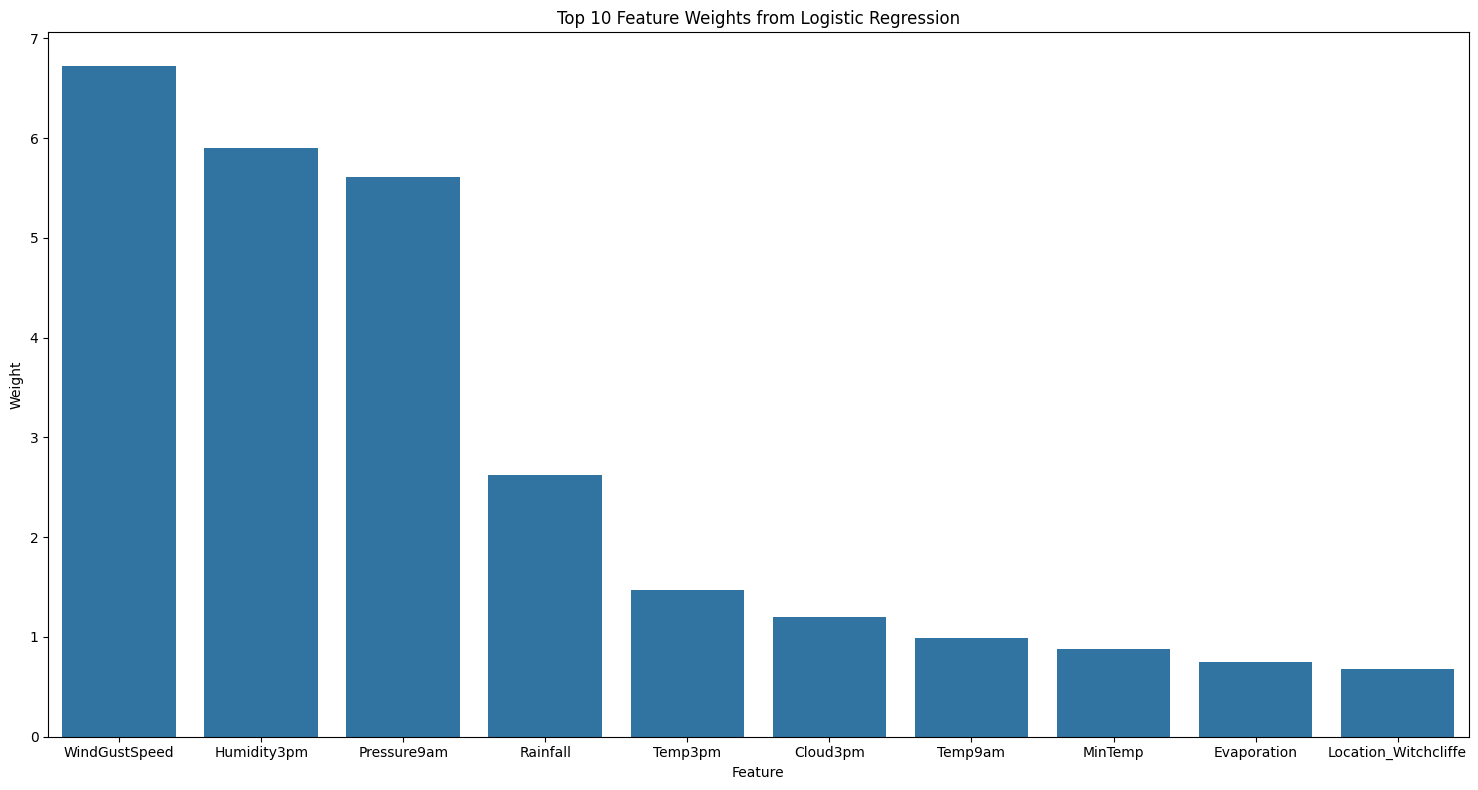

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature names and weights
feature = numerical_cols + encoded_cols
weights = model.coef_[0].tolist() # Assuming binary classification, take the first row of coefficients

print(feature)
print(weights)

# Create a DataFrame for plotting weights
weights_df = pd.DataFrame({'feature': feature, 'weight': weights})

plt.figure(figsize=(15, 8)) # Increased figure size for better readability
sns.barplot(data=weights_df.sort_values("weight", ascending=False).head(10), x="feature", y="weight")
plt.title('Top 10 Feature Weights from Logistic Regression')
plt.xlabel('Feature')
plt.ylabel('Weight')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


In [27]:
X_train = train_input[numerical_cols + encoded_cols]
X_val = val_input[numerical_cols + encoded_cols]
X_test = test_input[numerical_cols + encoded_cols]

train_predictions = model.predict(X_train)
# Calculate training accuracy
train_accuracy = accuracy_score(train_target, train_predictions)
print(f"Training Accuracy: {train_accuracy:.4f}")

Training Accuracy: 0.8518


In [28]:
from sklearn.metrics import accuracy_score

# Make predictions on the validation set
val_predictions = model.predict(X_val)
val_accuracy = accuracy_score(val_target, val_predictions)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Make predictions on the test set
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(test_target, test_predictions)
print(f"Test Accuracy: {test_accuracy:.4f}")

Validation Accuracy: 0.8507
Test Accuracy: 0.8464


In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train_target,train_predictions,normalize='true')

array([[0.94714058, 0.05285942],
       [0.48502898, 0.51497102]])

# Benchmark testing

In [35]:
def random_guess(inputs):
    return np.random.choice(["No", "Yes"], len(inputs))
def all_no(inputs):
    return np.full(len(inputs), "No")

print(accuracy_score(test_target, random_guess(X_test)))
print(accuracy_score(test_target, all_no(X_test)))

0.4974785140990127
0.7776475601960366


We can also test this with snigle inputs. First, let's create a sample single input DataFrame.we'll need to provide values for all numerical and categorical columns that were used during training. Make sure the column names match.